In [1]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


Error processing line 1 of c:\Users\harik\anaconda3\lib\site-packages\distutils-precedence.pth:

  Traceback (most recent call last):
    File "c:\Users\harik\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from geopy.geocoders import Nominatim
pd.set_option("display.max_columns",None)

In [ ]:
start_date=input("Enter the start date in yyyy/mm/dd format:")

In [ ]:
start_date=start_date.replace('/','')

In [ ]:
end_date=input("Enter end date in yyyy/mm/dd format:")

In [ ]:
end_date=end_date.replace('/','')


In [ ]:
address=input("Enter city name:")

In [ ]:
geolocator = Nominatim(user_agent="Nawya")
location=geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))
latitude=location.latitude
longitude=location.longitude

Vijayawada, Vijayawada (Urban), NTR District, Andhra Pradesh, 520001, India
(16.5087573, 80.6185089)


In [ ]:
url="https://power.larc.nasa.gov/api/temporal/daily/point?parameters=ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,WS2M,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,PS,WD50M&community=RE&longitude=78.1141&latitude=9.9261&start=20130101&end=20220101&format=CSV"

In [ ]:
urllib.request.urlretrieve(url,'Weather.csv')

('Weather.csv', <http.client.HTTPMessage at 0x1e2b94770d0>)

In [ ]:
df=pd.read_csv('Weather.csv',skiprows=21)
new_column = ['YEAR','MO','DY','ALLSKY_SFC_UVA','ALLSKY_SFC_UVB','WS2M','T2M_RANGE','T2M_MAX','T2M_MIN','QV2M','RH2M','PRECTOTCORR','WS10M_RANGE','PS','WD50M']
df.columns = new_column

In [ ]:
df.head()

,YEAR,MO,DY,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,WS2M,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,PS,WD50M
0,2013,1,2,12.52,0.37,1.90,14.13,33.84,19.71,12.70,66.50,0.0,2.92,98.68,74.69
1,2013,1,3,12.36,0.36,2.04,14.47,34.16,19.69,14.16,70.06,0.0,3.23,98.73,113.81
2,2013,1,4,11.64,0.35,1.57,12.50,33.62,21.12,14.59,70.06,0.0,2.37,98.65,125.19
3,2013,1,5,12.35,0.36,1.94,11.44,33.44,22.00,14.89,70.69,0.0,3.88,98.51,101.44
4,2013,1,6,11.35,0.33,2.27,11.50,33.62,22.13,15.08,69.88,0.0,3.82,98.53,45.38


In [ ]:
df['YEAR']=df.YEAR.astype(str)
df['MO']=df.MO.astype(str)
df['DY']=df.DY.astype(str)
df['date'] = df['YEAR'].str.cat(df['MO'],sep='/')
df['DATE'] = df['date'].str.cat(df['DY'],sep='/')
df.head()

,YEAR,MO,DY,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,WS2M,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,PS,WD50M,date,DATE
0,2013,1,2,12.52,0.37,1.90,14.13,33.84,19.71,12.70,66.50,0.0,2.92,98.68,74.69,2013/1,2013/1/2
1,2013,1,3,12.36,0.36,2.04,14.47,34.16,19.69,14.16,70.06,0.0,3.23,98.73,113.81,2013/1,2013/1/3
2,2013,1,4,11.64,0.35,1.57,12.50,33.62,21.12,14.59,70.06,0.0,2.37,98.65,125.19,2013/1,2013/1/4
3,2013,1,5,12.35,0.36,1.94,11.44,33.44,22.00,14.89,70.69,0.0,3.88,98.51,101.44,2013/1,2013/1/5
4,2013,1,6,11.35,0.33,2.27,11.50,33.62,22.13,15.08,69.88,0.0,3.82,98.53,45.38,2013/1,2013/1/6


In [ ]:
df.drop(columns=['YEAR','MO','DY','date'],axis=1,inplace=True)
df.head()

,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,WS2M,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,PS,WD50M,DATE
0,12.52,0.37,1.90,14.13,33.84,19.71,12.70,66.50,0.0,2.92,98.68,74.69,2013/1/2
1,12.36,0.36,2.04,14.47,34.16,19.69,14.16,70.06,0.0,3.23,98.73,113.81,2013/1/3
2,11.64,0.35,1.57,12.50,33.62,21.12,14.59,70.06,0.0,2.37,98.65,125.19,2013/1/4
3,12.35,0.36,1.94,11.44,33.44,22.00,14.89,70.69,0.0,3.88,98.51,101.44,2013/1/5
4,11.35,0.33,2.27,11.50,33.62,22.13,15.08,69.88,0.0,3.82,98.53,45.38,2013/1/6


In [ ]:
df.set_index(['DATE'],inplace = True)
df.head()

,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,WS2M,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,PS,WD50M
DATE,,,,,,,,,,,,
2013/1/2,12.52,0.37,1.90,14.13,33.84,19.71,12.70,66.50,0.0,2.92,98.68,74.69
2013/1/3,12.36,0.36,2.04,14.47,34.16,19.69,14.16,70.06,0.0,3.23,98.73,113.81
2013/1/4,11.64,0.35,1.57,12.50,33.62,21.12,14.59,70.06,0.0,2.37,98.65,125.19
2013/1/5,12.35,0.36,1.94,11.44,33.44,22.00,14.89,70.69,0.0,3.88,98.51,101.44
2013/1/6,11.35,0.33,2.27,11.50,33.62,22.13,15.08,69.88,0.0,3.82,98.53,45.38


In [ ]:
df.dtypes

ALLSKY_SFC_UVA    float64
ALLSKY_SFC_UVB    float64
WS2M              float64
T2M_RANGE         float64
T2M_MAX           float64
T2M_MIN           float64
QV2M              float64
RH2M              float64
PRECTOTCORR       float64
WS10M_RANGE       float64
PS                float64
WD50M             float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 2013/1/2 to 2022/1/1
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ALLSKY_SFC_UVA  3287 non-null   float64
 1   ALLSKY_SFC_UVB  3287 non-null   float64
 2   WS2M            3287 non-null   float64
 3   T2M_RANGE       3287 non-null   float64
 4   T2M_MAX         3287 non-null   float64
 5   T2M_MIN         3287 non-null   float64
 6   QV2M            3287 non-null   float64
 7   RH2M            3287 non-null   float64
 8   PRECTOTCORR     3287 non-null   float64
 9   WS10M_RANGE     3287 non-null   float64
 10  PS              3287 non-null   float64
 11  WD50M           3287 non-null   float64
dtypes: float64(12)
memory usage: 333.8+ KB


In [ ]:
with pd.option_context('display.max_rows',None,
                        'display.max_columns',None,
                        'display.precision',3,
                        ):
    print(df)

            ALLSKY_SFC_UVA  ALLSKY_SFC_UVB  WS2M  T2M_RANGE  T2M_MAX  T2M_MIN  \
DATE                                                                            
2013/1/2             12.52            0.37  1.90      14.13    33.84    19.71   
2013/1/3             12.36            0.36  2.04      14.47    34.16    19.69   
2013/1/4             11.64            0.35  1.57      12.50    33.62    21.12   
2013/1/5             12.35            0.36  1.94      11.44    33.44    22.00   
2013/1/6             11.35            0.33  2.27      11.50    33.62    22.13   
2013/1/7             11.24            0.32  2.52      12.34    33.73    21.39   
2013/1/8              5.62            0.18  2.16       9.72    31.19    21.48   
2013/1/9              5.12            0.16  2.37       7.68    29.82    22.14   
2013/1/10            13.55            0.39  2.42      11.93    32.58    20.65   
2013/1/11            12.78            0.37  2.43      13.77    33.11    19.33   
2013/1/12            11.95  

In [ ]:
df.shape

(3287, 12)

In [ ]:
df.isnull().any()

ALLSKY_SFC_UVA    False
ALLSKY_SFC_UVB    False
WS2M              False
T2M_RANGE         False
T2M_MAX           False
T2M_MIN           False
QV2M              False
RH2M              False
PRECTOTCORR       False
WS10M_RANGE       False
PS                False
WD50M             False
dtype: bool

In [ ]:
df.tail()

,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,WS2M,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,PS,WD50M
DATE,,,,,,,,,,,,
2021/12/28,13.55,0.38,1.86,10.77,27.71,16.94,14.40,85.88,0.00,2.20,98.88,47.88
2021/12/29,14.42,0.38,1.72,10.54,27.80,17.26,14.16,84.06,0.00,2.18,98.80,104.75
2021/12/30,12.04,0.34,2.22,8.15,26.61,18.46,15.56,88.12,4.71,2.16,98.84,106.50
2021/12/31,11.66,0.33,2.91,7.97,29.05,21.08,17.33,89.94,5.25,3.89,98.87,45.19
2022/1/1,10.66,0.30,3.20,6.52,28.88,22.36,17.64,90.06,14.33,3.83,98.90,50.25


In [ ]:
df.describe()

,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,WS2M,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,PS,WD50M
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,13.702136,0.399696,2.142294,10.914250,33.663286,22.749054,15.256784,68.502461,2.555260,3.456310,98.447210,173.650721
std,2.438030,0.075994,0.765896,3.114962,3.526162,2.489366,1.995778,11.819941,5.778695,1.254759,0.256563,84.333129
min,3.100000,0.090000,0.430000,2.790000,23.370000,14.160000,8.480000,35.120000,0.000000,0.730000,97.780000,14.750000
25%,12.270000,0.350000,1.620000,8.590000,31.195000,21.540000,13.980000,59.910000,0.010000,2.555000,98.240000,97.000000
50%,14.090000,0.410000,2.060000,10.900000,33.830000,23.170000,15.440000,67.440000,0.320000,3.280000,98.420000,168.810000
75%,15.535000,0.460000,2.540000,13.255000,36.130000,24.390000,16.850000,77.120000,2.410000,4.230000,98.650000,259.280000
max,18.420000,0.560000,5.340000,19.480000,43.330000,29.640000,19.840000,94.810000,105.440000,7.830000,99.170000,335.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print("Scaled df:\n",df_scaled, '\n', df_scaled.shape)

Scaled df:
 [[0.61488251 0.59574468 0.299389   ... 0.3084507  0.64748201 0.18716628]
 [0.60443864 0.57446809 0.32790224 ... 0.35211268 0.68345324 0.30932084]
 [0.55744125 0.55319149 0.23217923 ... 0.23098592 0.62589928 0.34485558]
 ...
 [0.58355091 0.53191489 0.36456212 ... 0.20140845 0.76258993 0.28649493]
 [0.55874674 0.5106383  0.50509165 ... 0.44507042 0.78417266 0.09505074]
 [0.49347258 0.44680851 0.56415479 ... 0.43661972 0.8057554  0.1108509 ]] 
 (3287, 12)


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_scaled,test_size = 0.2,shuffle = False)

x_train,y_train,x_test,y_test=[],[],[],[]
for i in range (1,len(train)):
    x_train.append(train[i-1])
    y_train.append(train[i])
for i in range (1, len(test)):
    x_test.append(train[i-1])
    y_test.append(train[i])

In [ ]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.614883,0.595745,0.299389,0.679449,0.524549,0.358527,0.371479,0.525716,0.000000,0.308451,0.647482,0.187166
1,0.604439,0.574468,0.327902,0.699820,0.540581,0.357235,0.500000,0.585358,0.000000,0.352113,0.683453,0.309321
2,0.557441,0.553191,0.232179,0.581786,0.513527,0.449612,0.537852,0.585358,0.000000,0.230986,0.625899,0.344856
3,0.603786,0.574468,0.307536,0.518274,0.504509,0.506460,0.564261,0.595912,0.000000,0.443662,0.525180,0.270695
4,0.538512,0.510638,0.374745,0.521869,0.513527,0.514858,0.580986,0.582342,0.000000,0.435211,0.539568,0.095644
...,...,...,...,...,...,...,...,...,...,...,...,...
2623,0.817885,0.829787,0.407332,0.711803,0.773046,0.644057,0.500000,0.353996,0.000474,0.591549,0.525180,0.260921
2624,0.954961,0.936170,0.407332,0.760336,0.760521,0.574935,0.382042,0.327861,0.000000,0.604225,0.568345,0.237721
2625,0.890992,0.893617,0.317719,0.715398,0.724950,0.578165,0.413732,0.359189,0.001328,0.649296,0.589928,0.309539
2626,0.862272,0.851064,0.356415,0.784901,0.746493,0.531008,0.413732,0.360194,0.001233,0.592958,0.647482,0.279875


In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_test,y_test=np.array(x_test),np.array(y_test)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2628, 12), (2628, 12), (657, 12), (657, 12))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(Dense(12, input_dim = 12,activation = 'relu'))
model.add(Dense(18,activation = 'relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(12))
model.summary()
model.compile(optimizer ='adam',loss= 'mse', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 18)                234       
                                                                 
 dense_2 (Dense)             (None, 18)                342       
                                                                 
 dense_3 (Dense)             (None, 12)                228       
                                                                 
Total params: 960 (3.75 KB)
Trainable params: 960 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size =15,shuffle=False)

Epoch 1/200
176/176 [==============================] - 1s 3ms/step - loss: 0.1162 - accuracy: 0.2127 - val_loss: 0.0288 - val_accuracy: 0.2755
Epoch 2/200
176/176 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.2538 - val_loss: 0.0263 - val_accuracy: 0.2618
Epoch 3/200
176/176 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.2782 - val_loss: 0.0236 - val_accuracy: 0.2831
Epoch 4/200
176/176 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.2987 - val_loss: 0.0200 - val_accuracy: 0.2694
Epoch 5/200
176/176 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.3330 - val_loss: 0.0175 - val_accuracy: 0.2542
Epoch 6/200
176/176 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.3447 - val_loss: 0.0155 - val_accuracy: 0.2496
Epoch 7/200
176/176 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.3516 - val_loss: 0.0141 - val_accuracy: 0.2846

In [ ]:
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)
actual_y_pred=scaler.inverse_transform(y_test)

21/21 [==============================] - 0s 1ms/step


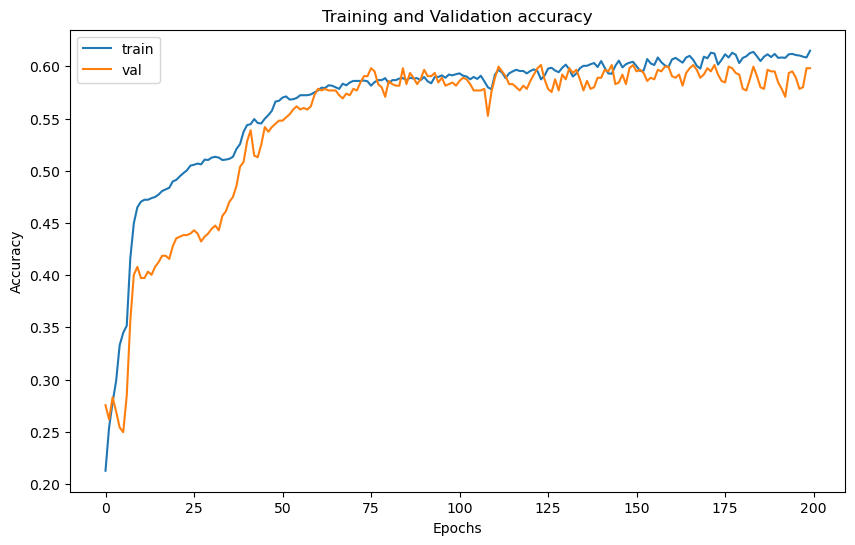

In [ ]:
plt.rcParams["figure.figsize"]=(10,6)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='upper left')
plt.show()

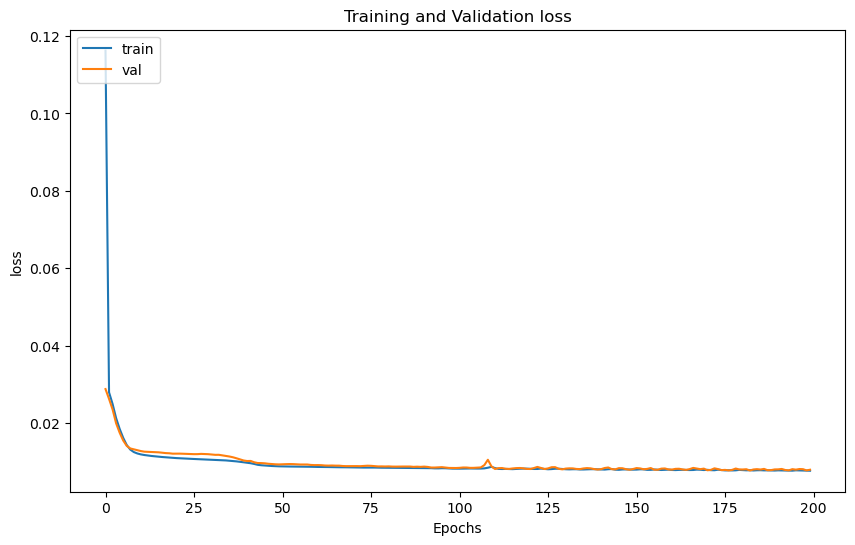

In [ ]:
plt.rcParams["figure.figsize"]=(10,6)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
print('Actual values:')
print(actual_y_pred)
print('')
print('Predicted values:')
print(y_pred)

Actual values:
[[ 12.36   0.36   2.04 ...   3.23  98.73 113.81]
 [ 11.64   0.35   1.57 ...   2.37  98.65 125.19]
 [ 12.35   0.36   1.94 ...   3.88  98.51 101.44]
 ...
 [  7.65   0.23   2.3  ...   2.98  98.52 148.94]
 [  9.03   0.27   1.91 ...   2.47  98.56 140.44]
 [  5.92   0.17   2.2  ...   2.56  98.71  43.38]]

Predicted values:
[[ 13.08253      0.37465265   2.0148551  ...   3.5596967   98.72651
   78.799736  ]
 [ 13.045808     0.37785995   2.054436   ...   3.305431    98.7293
   90.15607   ]
 [ 12.750046     0.36879623   1.6820735  ...   2.93024     98.63684
  112.871796  ]
 ...
 [  8.5752325    0.23917867   2.4780161  ...   3.6284828   98.51402
   91.780716  ]
 [  9.256155     0.25842127   1.8796709  ...   2.863433    98.52799
  135.69987   ]
 [ 10.050027     0.28576615   1.665372   ...   2.7096934   98.58469
  114.309364  ]]


In [ ]:
scores=model.evaluate(actual_y_pred,y_pred,verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 51.75%


In [ ]:
T=range(y_pred.shape[0])

Text(0, 0.5, 'Temperature')

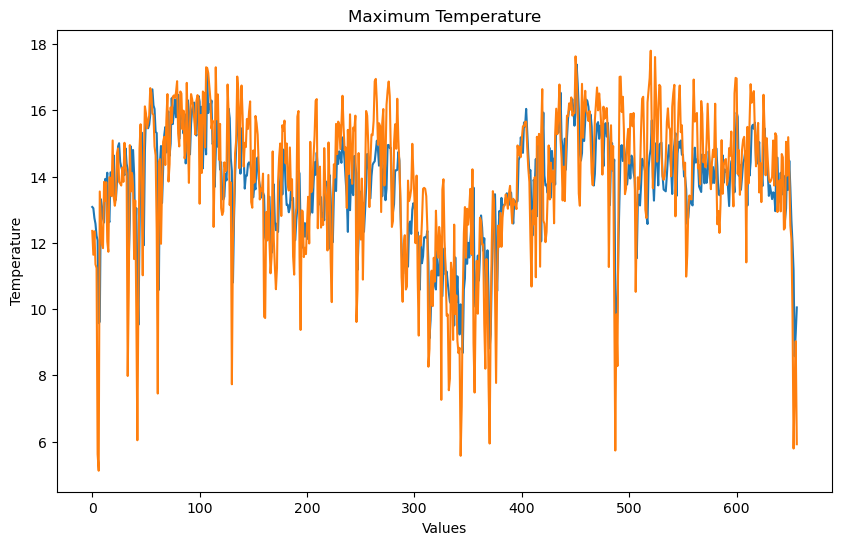

In [ ]:
plt.plot(T, y_pred[:, 0])
plt.plot(T, actual_y_pred[:,0])
plt.rcParams["figure.figsize"] = (10, 6)
plt.title('Maximum Temperature')
plt.xlabel('Values')
plt.ylabel('Temperature')

Text(0, 0.5, 'Humidity')

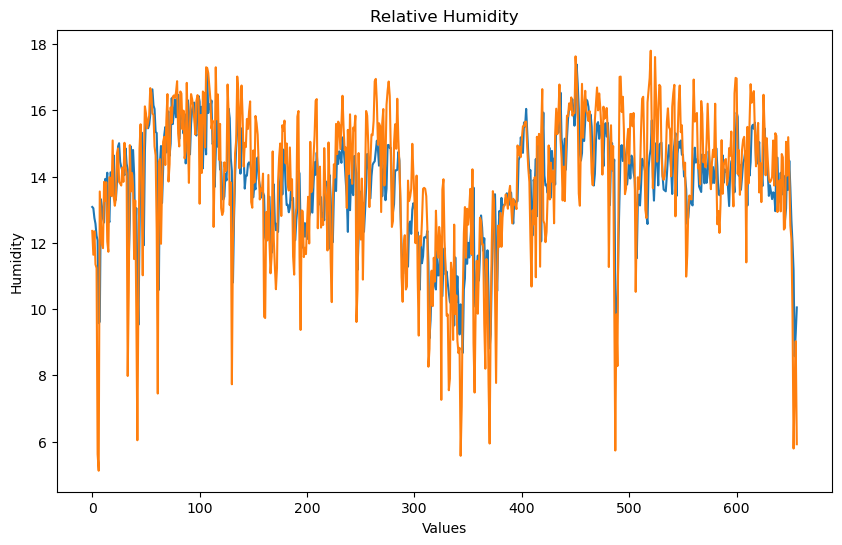

In [ ]:
plt.plot(T, y_pred[:, 0])
plt.plot(T, actual_y_pred[:,0])
plt.rcParams["figure.figsize"] = (10, 6)
plt.title('Relative Humidity')
plt.xlabel('Values')
plt.ylabel('Humidity')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have defined your machine learning model as 'model' and your data as 'x_train' and 'y_train'

# Initialize k-fold cross-validation
kf = KFold(n_splits=10, shuffle=False)
results = []

for train_idx, test_idx in kf.split(x_train):
    x_train_fold, x_test_fold = x_train[train_idx], x_train[test_idx]
    y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

    # Fit the model on the training data
    model.fit(x_train_fold, y_train_fold)

    # Make predictions on the test data
    predictions = model.predict(x_test_fold)

    # Calculate the Mean Squared Error (MSE) for this fold
    mse = mean_squared_error(y_test_fold, predictions)

    results.append((predictions, mse))

# Now, 'results' contains the predictions and MSE for each fold


9/9 [==============================] - 0s 1ms/step


In [ ]:
input_data =[]
print('Enter the weather parameters of the previous day')
attr1=float(input("Enter ALLSKY_SFC_UVA"))
attr2=float(input("Enter ALLSKY_SFC_UVB "))
attr3=float(input("Enter WS2M"))
attr4=float(input("Enter T2M_RANGE "))
attr5=float(input("Enter T2M_MAX "))
attr6=float(input("Enter T2M_MIN "))
attr7=float(input("Enter QV2M "))
attr8=float(input("Enter RH2M "))
attr9=float(input("Enter 	PRECTOTCORR "))
attr10=float(input("Enter WS10M_RANGE "))
attr11=float(input("Enter PS "))
attr12=float(input("Enter WD50M "))
input_data.append(attr1)
input_data.append(attr2)
input_data.append(attr3)
input_data.append(attr4)
input_data.append(attr5)
input_data.append(attr6)
input_data.append(attr7)
input_data.append(attr8)
input_data.append(attr9)
input_data.append(attr10)
input_data.append(attr11)
input_data.append(attr12)
input_data = np.array(input_data)
input_data.shape = (1,12)
print('Input data',input_data)
scaled_input_data = scaler.fit_transform(input_data)
print('Scaled input Data:', input_data)
pred1= model.predict(input_data)
pred2=scaler.inverse_transform(pred1)
print('Predicted Data:')
pd.DataFrame(pred2)

Enter the weather parameters of the previous day
Input data [[ 11.    0.5   2.   11.   38.   24.   66.5   0.    3.   99.  125.  125. ]]
Scaled input Data: [[ 11.    0.5   2.   11.   38.   24.   66.5   0.    3.   99.  125.  125. ]]
1/1 [==============================] - 0s 26ms/step
Predicted Data:


,0,1,2,3,4,5,6,7,8,9,10,11
0,53.421822,51.476803,28.362116,-6.73546,54.217766,56.993122,103.081161,12.047425,16.657425,116.737938,144.240463,159.461472


In [ ]:
%pip install timezonefinder

Note: you may need to restart the kernel to use updated packages.


Error processing line 1 of c:\Users\harik\anaconda3\lib\site-packages\distutils-precedence.pth:

  Traceback (most recent call last):
    File "c:\Users\harik\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored


In [ ]:
%pip install timezonefinder

Note: you may need to restart the kernel to use updated packages.


Error processing line 1 of c:\Users\harik\anaconda3\lib\site-packages\distutils-precedence.pth:

  Traceback (most recent call last):
    File "c:\Users\harik\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
